# This is an example of how to use the Drawing_package!

### <b>1.</b> Load packages

In [35]:
from drawing_package import base64todrawing
from drawing_package import drawingexperiment
from colormap import rgb2hex
from PIL import Image
from pathlib import Path

import os
import numpy as np
import pandas as pd
import cv2
import os.path
import json
import base64
import statsmodels.api as sm
import seaborn as sns

### <b>2.</b> Convert base64 -> drawings, then save those drawings as images

In [2]:
savepath = '/Users/brainbridgelab/Documents/Classes/Data-Science/' # folder where you want drawings saved
jsonfile = '/Users/brainbridgelab/Documents/Research/Drawing Time/testphase-10-22-22.json'

# Run base64todrawing function
base64todrawing.base64todrawing(savepath,jsonfile)

### <b>3.</b> Make a dictionary with every drawing path in it

In [36]:
pathdrawings = '/Users/brainbridgelab/Documents/Classes/Data-Science/' # path to drawings
# pathdrawings = '/Users/brainbrdigelab/Documents/Research/Drawing Time/ConditionDrawings/'

dict_results = {}

# this prints the whole path for the image
files = Path(pathdrawings).glob("*.png")
for i in files:
    dict_results.update({i: {}})
#     dict_results[i] = i

dict_results

{PosixPath('/Users/brainbridgelab/Documents/Classes/Data-Science/5f51135fd3e0342eda5f66c5_5min.png'): {},
 PosixPath('/Users/brainbridgelab/Documents/Classes/Data-Science/60fd85a7fe7bc5029167ba30_5min.png'): {},
 PosixPath('/Users/brainbridgelab/Documents/Classes/Data-Science/5ba9a99738803d00012729de_2days.png'): {},
 PosixPath('/Users/brainbridgelab/Documents/Classes/Data-Science/5e67e5ef1787b3062e9960a7_1hr.png'): {},
 PosixPath('/Users/brainbridgelab/Documents/Classes/Data-Science/5f5be09e16b98d18b3d213db_1wk.png'): {},
 PosixPath('/Users/brainbridgelab/Documents/Classes/Data-Science/592ed8978ad1ae0001937919_5min.png'): {},
 PosixPath('/Users/brainbridgelab/Documents/Classes/Data-Science/60de493b30efe44c987e2d64_1hr.png'): {},
 PosixPath('/Users/brainbridgelab/Documents/Classes/Data-Science/5ab942eca3ba7a0001b41f88_5min.png'): {},
 PosixPath('/Users/brainbridgelab/Documents/Classes/Data-Science/5d30d94d6c17550001d3ba17_immediately.png'): {},
 PosixPath('/Users/brainbridgelab/Documen

### <b>4.</b> Create a dataframe with color analysis results of each drawing

In [45]:
# Loops through drawings to calculate the proportion of nonwhitepx & number of colors
for k, v in dict_results.items():
    df_color = drawingexperiment.extract_color_profile(k)
    dict_results[k].update({'prop_nonwhitepx': drawingexperiment.extract_nonwhitepx(df_color)})
    dict_results[k].update({'numcolors': drawingexperiment.extract_numcolors(df_color)})
    dict_results[k].update({'drawingname': os.path.splitext(os.path.basename(k))[0]})
    drawingname = os.path.splitext(os.path.basename(k))[0]
    dict_results[k].update({'timecond': drawingname.rsplit('_', 1)[1]})

# dict_results

# Make into dictionary
df_results = pd.DataFrame.from_dict(dict_results).T

# convert timecond values to numbers (in hours)
df_results['timecond'] = df_results['timecond'].replace(['immediately','5min','1hr','1day','2days','1wk'],['0','0.083','1','24','48','168'])
df_results['timecond'] = pd.to_numeric(df_results['timecond'])
df_results['numcolors'] = pd.to_numeric(df_results['numcolors'])
df_results['prop_nonwhitepx'] = pd.to_numeric(df_results['prop_nonwhitepx'])


df_results


,prop_nonwhitepx,numcolors,drawingname,timecond
/Users/brainbridgelab/Documents/Classes/Data-Science/5f51135fd3e0342eda5f66c5_5min.png,0.140008,7,5f51135fd3e0342eda5f66c5_5min,0.083
/Users/brainbridgelab/Documents/Classes/Data-Science/60fd85a7fe7bc5029167ba30_5min.png,0.114624,6,60fd85a7fe7bc5029167ba30_5min,0.083
/Users/brainbridgelab/Documents/Classes/Data-Science/5ba9a99738803d00012729de_2days.png,0.277124,29,5ba9a99738803d00012729de_2days,48.000
/Users/brainbridgelab/Documents/Classes/Data-Science/5e67e5ef1787b3062e9960a7_1hr.png,0.114780,25,5e67e5ef1787b3062e9960a7_1hr,1.000
/Users/brainbridgelab/Documents/Classes/Data-Science/5f5be09e16b98d18b3d213db_1wk.png,0.068852,15,5f5be09e16b98d18b3d213db_1wk,168.000
...,...,...,...,...
/Users/brainbridgelab/Documents/Classes/Data-Science/61366c725569c261e9c0b261_5min.png,0.100064,7,61366c725569c261e9c0b261_5min,0.083
/Users/brainbridgelab/Documents/Classes/Data-Science/5a95976f1ade740001b8cb2b_1day.png,0.033880,6,5a95976f1ade740001b8cb2b_1day,24.000
/Users/brainbridgelab/Documents/Classes/Data-Science/62e3288eb7aa90f42d1a796b_1wk.png,0.179648,14,62e3288eb7aa90f42d1a796b_1wk,168.000
/Users/brainbridgelab/Documents/Classes/Data-Science/5c4d5328889752000156a11d_1hr.png,0.202008,31,5c4d5328889752000156a11d_1hr,1.000


### <b>5.</b> Run a linear regression: Does delay time predict the amount of ink in the recalled drawing?

In [46]:
# Plot specifications here
plot_width_inch = 7
plot_height_inch = 7
x_jitter = 5;
scatter_color = ('green')
scatter_transparency = (0.15)
line_color = ('green')
xlabel = ('Hours Before Recall')
ylabel = ('Proportion of Drawing Containing Ink')
title = ('Ink in Drawing Over Delay Time')

                                 OLS Regression Results                                
Dep. Variable:        prop_nonwhitepx   R-squared (uncentered):                   0.269
Model:                            OLS   Adj. R-squared (uncentered):              0.265
Method:                 Least Squares   F-statistic:                              81.51
Date:                Mon, 05 Dec 2022   Prob (F-statistic):                    8.57e-17
Time:                        13:08:49   Log-Likelihood:                          151.88
No. Observations:                 223   AIC:                                     -301.8
Df Residuals:                     222   BIC:                                     -298.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

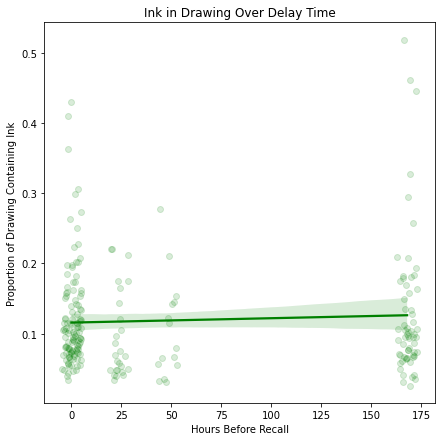

In [47]:
# Run simple linear regression
mod = sm.OLS(df_results.prop_nonwhitepx, df_results.timecond, missing = 'drop')
res = mod.fit()
print(res.summary())

# Add visual appeal
ax = sns.regplot(
    x="timecond",
    y="prop_nonwhitepx",
    data=df_results,
    color = scatter_color,
    x_jitter = x_jitter,
    scatter_kws={'alpha':scatter_transparency},
    line_kws={'color': line_color})
#     hue='timecond')
    
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.set(title=title)
ax.figure.set_size_inches(plot_width_inch, plot_height_inch)

In [9]:
numcolor = df_color.shape[0]
df_color

,c_code,occurence,proportion
0,#FFFFFF,235505,0.942020
1,#000000,13645,0.054580
2,#8E8E8E,222,0.000888
3,#404040,220,0.000880
4,#202020,214,0.000856
5,#BFBFBF,101,0.000404


In [19]:
numcolors[

KeyError: 0